# Google Playstore Reviews

https://www.kaggle.com/lava18/google-play-store-apps

Selected Outcome Variable: Rating

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

% matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.head()

# This record has some issues
df.iloc[10472]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              1.9
rating                                                 19
reviews                                              3.0M
size                                               1,000+
installs                                             Free
type                                                    0
price                                            Everyone
content_rating                                        NaN
genres                                  February 11, 2018
last_updated                                       1.0.19
current_ver                                    4.0 and up
android_ver                                           NaN
Name: 10472, dtype: object

In [3]:
df.price.unique()

# Correct cell 10472, values clearly transposed one columns over
df.iloc[10472]
for i in reversed(range(2, len(df.columns)-1)):
               df.iloc[10472, i] = df.iloc[10472, i-1]

df.iloc[10472, 1] = 'NaN'
print(df.iloc[10472])

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              NaN
rating                                                1.9
reviews                                                19
size                                                 3.0M
installs                                           1,000+
type                                                 Free
price                                                   0
content_rating                                   Everyone
genres                                                NaN
last_updated                            February 11, 2018
current_ver                                        1.0.19
android_ver                                           NaN
Name: 10472, dtype: object


In [4]:
df['size'].unique()
df.category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       'NaN'], dtype=object)

In [5]:
print(df.installs.unique())
print(df.loc[df.installs=='5,000,000+'])

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
                                                     app             category  \
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
18                         FlipaClip - Cartoon animation       ART_AND_DESIGN   
37                                    Floor Plan Creator       ART_AND_DESIGN   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
69                           Used cars for sale - Trovit    AUTO_AND_VEHICLES   
70     Fines of the State Traffic Safety Inspectorate...    AUTO_AND_VEHICLES   
153                       AlReader -any text book reader  BOOKS_AND_REFERENCE   
164                                         Ebook Reader  BOOKS_AND_REFERENCE   
166                                    Read books online  BOO

## Select 4-5 Variables
1. Category (categorical)
2. Reviews
3. Size
4. Price
5. Installs


In [6]:
# Create an installs variable that is numeric
df['installs_num'] = df.installs.str.replace(',', '')
df['installs_num'] = df.installs_num.str.replace('+', '')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null object
reviews           10841 non-null object
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null object
dtypes: object(14)
memory usage: 1.2+ MB
None


In [7]:
df['reviews'] = pd.to_numeric(df['reviews'])
df['installs_num'] = pd.to_numeric(df['installs_num'])
df['rating'] = pd.to_numeric(df['rating'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
reviews           10841 non-null float64
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [8]:
# Convert the size of the application to a numerical value
def value_to_float(x):
    # k stands for kilo, *1000
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    # M stands for mega, *1000000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
    else:
        try:
            return float(x)
        except:
            return float('NaN')

df['size_num'] = df['size'].apply(value_to_float)

df['size_num'] = pd.to_numeric(df['size_num'])

df.size_num.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: size_num, dtype: float64

In [9]:
df['price_num'] = pd.to_numeric(df['price'].str.replace('$', ''))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
reviews           10841 non-null float64
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null int64
size_num          9146 non-null float64
price_num         10841 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


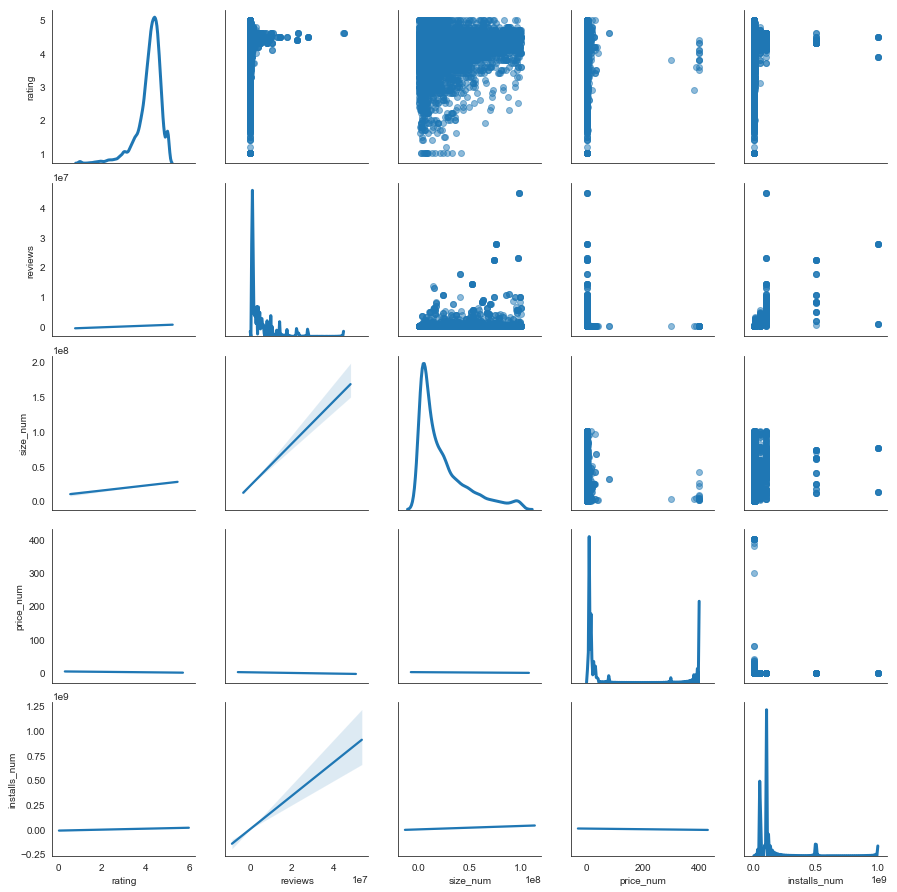

In [10]:
df_numeric = df[['rating', 'reviews', 'size_num', 'price_num', 'installs_num']]

sns.set_style('white')

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_numeric.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()


                rating   reviews  size_num  price_num  installs_num
rating        1.000000  0.068147  0.084096  -0.021851      0.051393
reviews       0.068147  1.000000  0.238219  -0.009666      0.643123
size_num      0.084096  0.238219  1.000000  -0.022999      0.164795
price_num    -0.021851 -0.009666 -0.022999   1.000000     -0.011688
installs_num  0.051393  0.643123  0.164795  -0.011688      1.000000


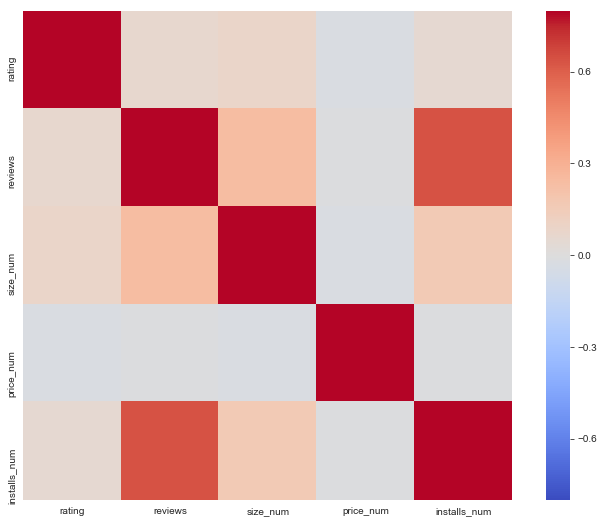

In [11]:
# Make a correlation matrix
corrmat = df_numeric.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True, cmap='coolwarm')
plt.show()

### Looks like number of reviews and number of installs are correlated

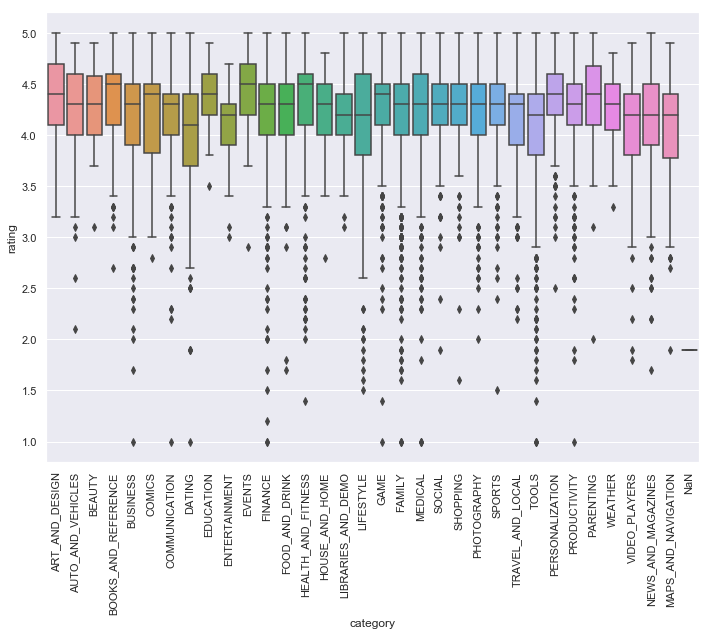

In [12]:
# Plot all the variables with boxplots

# Melt the dataframe so that we can plot with a facetgrid
variables = ['reviews', 'size_num', 'price_num', 'installs_num']


# the size of A4 paper
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(data=df, x='category', y='rating')
plt.xticks(rotation=90)
plt.show()

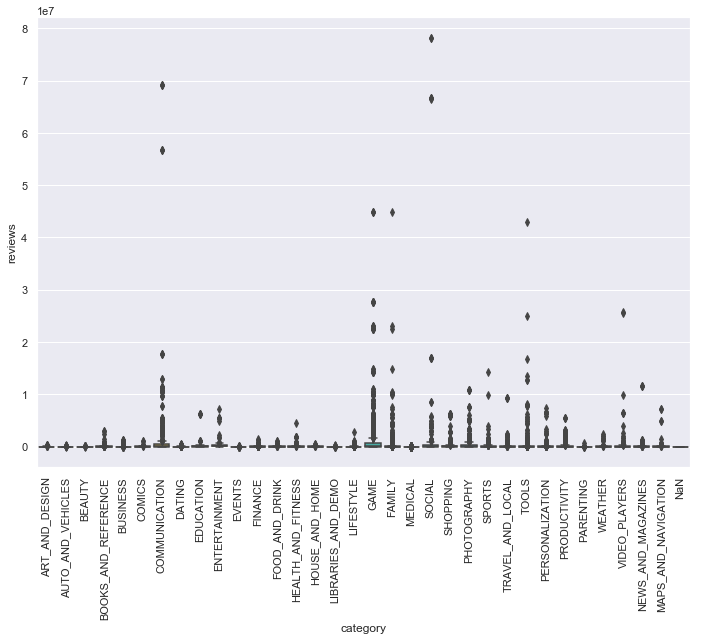

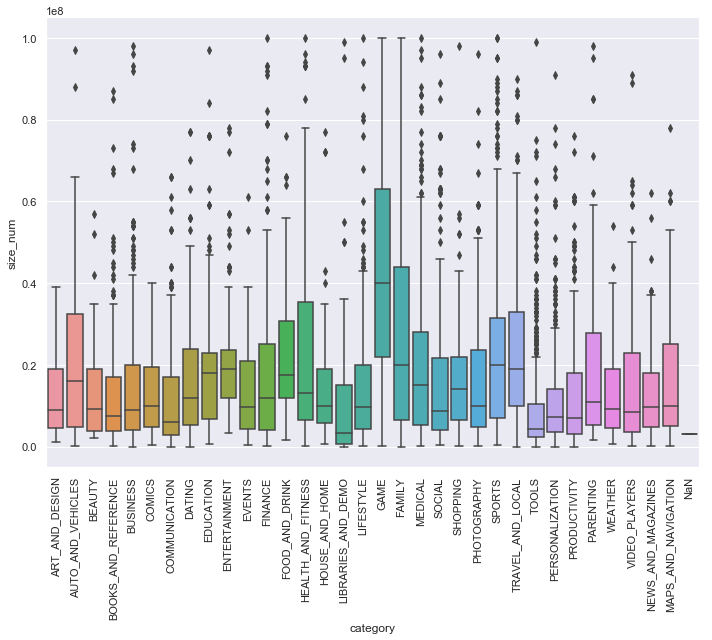

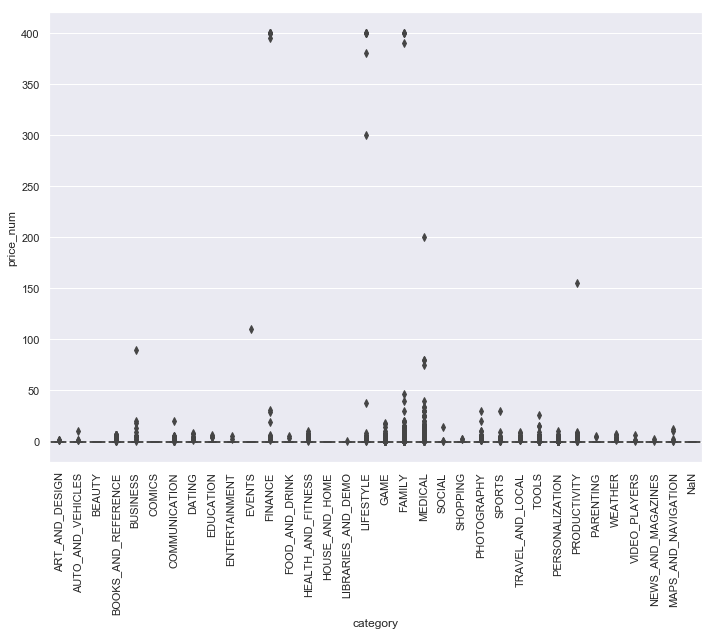

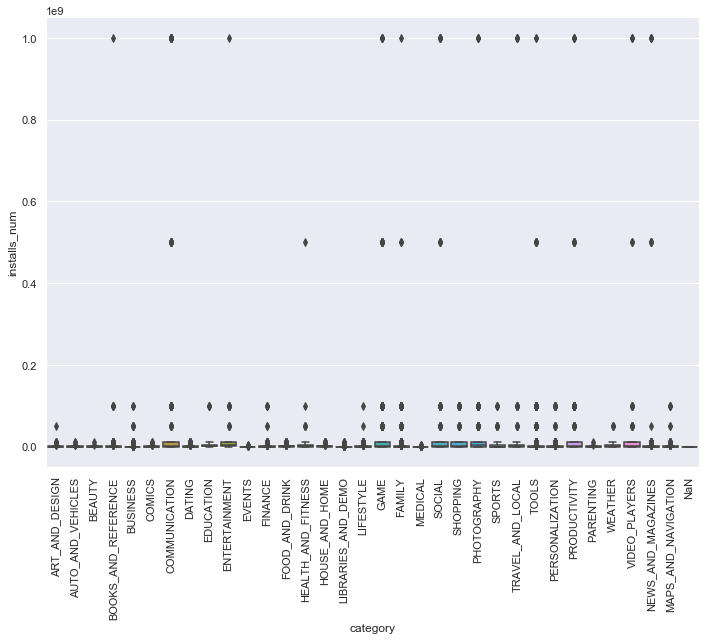

In [13]:
for variable in variables:
    # the size of A4 paper
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    sns.boxplot(data=df, x='category', y=variable)
    plt.xticks(rotation=90)
    plt.show()

In [14]:
df[df['price_num'] > 300].head()
# It appears as though this is a sarcastic app? This may skew results.

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,installs_num,size_num,price_num
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100+,Paid,$399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,100,1500000.0,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10000,26000000.0,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000,7300000.0,400.00
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,100000,1800000.0,399.99
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000,8700000.0,399.99


In [15]:
# Making some dummy variables
features = pd.get_dummies(df['category'])
features.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create a categorical variable from 
features['expensive'] = np.where(df['price_num'] > 100, 1, 0)
features['inexpensive'] = np.where(df['price_num'] < 1, 1, 0)

# Check that it worked
print(df['price_num'].groupby(features['expensive']).describe())
print(df['price_num'].groupby(features['inexpensive']).describe())

             count        mean        std     min     25%     50%     75%  \
expensive                                                                   
0          10821.0    0.370285   2.521709    0.00    0.00    0.00    0.00   
1             20.0  356.491000  90.844790  109.99  387.49  399.99  399.99   

              max  
expensive          
0           89.99  
1          400.00  
               count       mean        std  min   25%   50%   75%     max
inexpensive                                                              
0              652.0  16.856058  62.995038  1.0  2.49  3.99  5.99  400.00
1            10189.0   0.014380   0.118453  0.0  0.00  0.00  0.00    0.99


                       reviews  installs_num  num_reviews_installs
reviews               1.000000      0.643123              0.923384
installs_num          0.643123      1.000000              0.887809
num_reviews_installs  0.923384      0.887809              1.000000


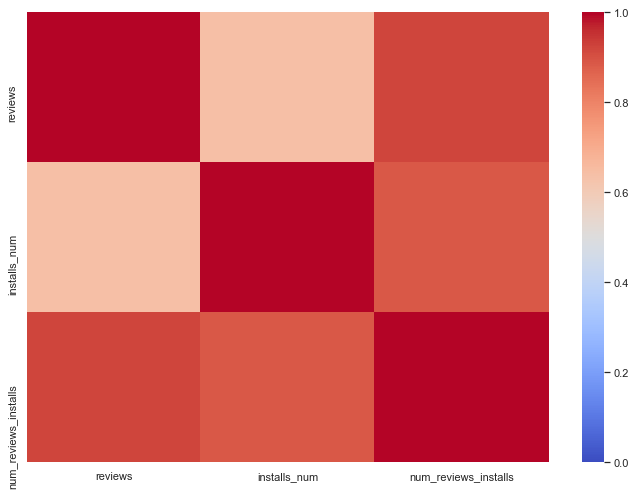

In [17]:
# installs_num and reviews are highly correlated and somewhat redundant.  
# Try combining them

means = df[['reviews', 'installs_num']].mean(axis=0)
stds = df[['reviews', 'installs_num']].mean(axis=0)

features['num_reviews_installs'] = ((df[['reviews', 'installs_num']] - means) / stds).mean(axis=1)

# Check and see how the composite correlates with the individual variables
plotdf = df.loc[:, ['reviews', 'installs_num']]
plotdf['num_reviews_installs'] = features['num_reviews_installs']
corrmat2 = plotdf.corr()

print(corrmat2)

sns.heatmap(corrmat2, vmax=1, vmin=0, cmap='coolwarm')

In [18]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 37 columns):
ART_AND_DESIGN          10841 non-null uint8
AUTO_AND_VEHICLES       10841 non-null uint8
BEAUTY                  10841 non-null uint8
BOOKS_AND_REFERENCE     10841 non-null uint8
BUSINESS                10841 non-null uint8
COMICS                  10841 non-null uint8
COMMUNICATION           10841 non-null uint8
DATING                  10841 non-null uint8
EDUCATION               10841 non-null uint8
ENTERTAINMENT           10841 non-null uint8
EVENTS                  10841 non-null uint8
FAMILY                  10841 non-null uint8
FINANCE                 10841 non-null uint8
FOOD_AND_DRINK          10841 non-null uint8
GAME                    10841 non-null uint8
HEALTH_AND_FITNESS      10841 non-null uint8
HOUSE_AND_HOME          10841 non-null uint8
LIBRARIES_AND_DEMO      10841 non-null uint8
LIFESTYLE               10841 non-null uint8
MAPS_AND_NAVIGATION     10841 non-nu

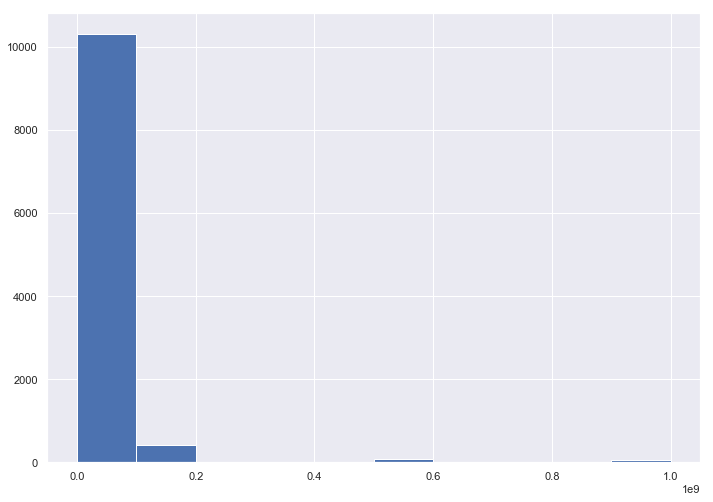

In [21]:
# The number of installs is not normally distributed
plt.hist(df['installs_num'])
plt.show()

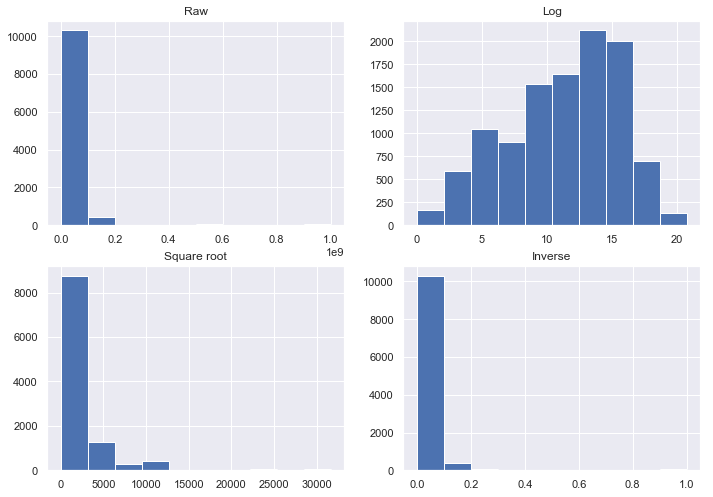

In [32]:
# Create a function to avoid taking log of 0
def log_array(x):
    if x <= 0:
        return 0
    else :
        return np.log(x)
    
# Create a function to avoid inverse of 0
def inv_array(x):
    if x <= 0:
        return 0
    else:
        return 1/x

fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['installs_num'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(df['installs_num'].dropna().apply(log_array))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['installs_num'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(df['installs_num'].dropna().apply(inv_array))
plt.title('Inverse')
plt.show()

# As expected from the form of the data, the log one looks more informative, but still
# not normal
features['log_installs_num'] = df['installs_num'].apply(log_array)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


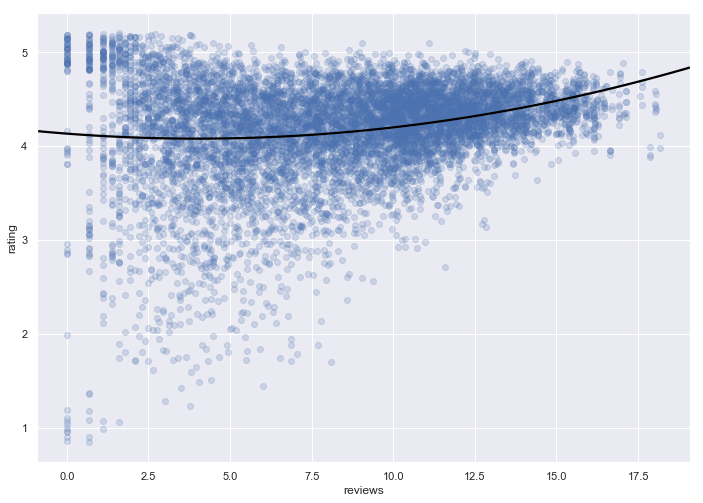

In [38]:
sns.regplot(
    x=df['reviews'].apply(log_array),
    y=df['rating'],
    y_jitter=.2,
    order=2,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'black'},
    ci=.05
)
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


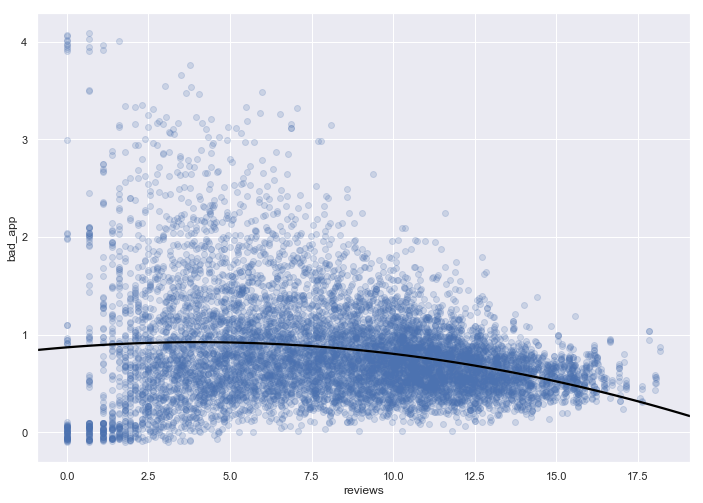

In [43]:
# Reverse code the review rating so that a higher score means a bad app
features['bad_app'] = max(df['rating']) - df['rating']

sns.regplot(
    x=df['reviews'].apply(log_array),
    y=features['bad_app'],
    y_jitter=.1,
    order=2,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'black'},
    ci=.05
)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


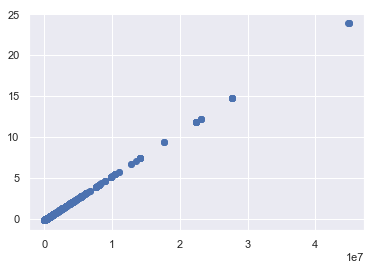

             rating      reviews  installs_num      size_num     price_num
count  7.730000e+03  7730.000000  7.730000e+03  7.730000e+03  7.730000e+03
mean   4.118023e-16     0.000000 -2.206084e-17  7.353612e-17 -2.573764e-17
std    1.000065e+00     1.000065  1.000065e+00  1.000065e+00  1.000065e+00
min   -5.821911e+00    -0.158151 -1.678894e-01 -9.787988e-01 -6.480057e-02
25%   -3.183924e-01    -0.158094 -1.676900e-01 -7.530865e-01 -6.480057e-02
50%    2.319594e-01    -0.156904 -1.658947e-01 -3.819824e-01 -6.480057e-02
75%    5.988606e-01    -0.137239 -1.479421e-01  4.284749e-01 -6.480057e-02
max    1.516114e+00    23.939622  1.977942e+01  3.286403e+00  2.292496e+01


In [48]:
# Change features to have the same range
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save column names
names = df_num.columns

# Scale, then turn the resulting numpy array back into a data frame
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

plt.scatter(df_num['reviews'], df_scaled['reviews'])
plt.show()

print(df_scaled.describe())